In [1]:
import pandas as pd
from sklearn import tree
import graphviz
from sklearn import model_selection

In [2]:
variable_names=['IR','MR','FF','CR','CO','OP']

raw_data = pd.read_csv('session6_homework_data.csv',names=variable_names+['Class'])

data = raw_data.replace({'P':1,'A':0,'N':-1,'B':1,'NB':0})

In [3]:
X = data[variable_names]
y = data.Class

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state = 0)

In [4]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

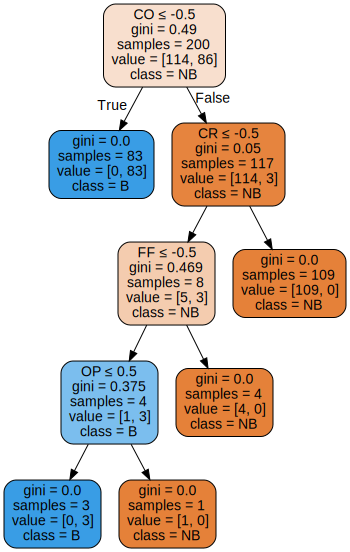

In [5]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=variable_names,  
                         class_names=['NB','B'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [6]:
clf.score(X_test, y_test)

1.0

We can see the acccuracy on the test data is 100%, which is a good result for this model while an 'embarrassing' result for this assignment......

So, maybe I can do a cross validation to see whether it performs well on each split of data.

In [7]:
seed = 0
kfold = model_selection.KFold(n_splits=10, random_state=seed)

In [8]:
results = model_selection.cross_val_score(clf, X_train, y_train, cv=kfold)
print(results)
print(results.mean())

[1.   1.   1.   1.   1.   0.95 1.   1.   1.   0.95]
0.9899999999999999


We can see most of the accuracy are 100%. It possibly means most of the data is very good while only some of them are exceptions.

We can say basically say that we find the pattern to predict bankrupcy based on this model while there are only very few exceptions which are inevitable. Maybe the data itself is wrong...

# Bagging

### Bagged Decision Trees

In [9]:
# Bagged Decision Trees for Classification
from sklearn.ensemble import BaggingClassifier
cart = tree.DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results)
print(results.mean())

[1.   1.   1.   1.   1.   0.95 1.   1.   1.   0.95]
0.9899999999999999


In [10]:
model.fit(X_train, y_train).score(X_test, y_test)

1.0

We can see the result is basically the same.

### Random Forest

In [33]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results)
print(results.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0


In [12]:
model.fit(X_train, y_train).score(X_test, y_test)

1.0

### Extra Trees

In [13]:
# Extra Trees Classification
from sklearn.ensemble import ExtraTreesClassifier
max_features = 5
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results)
print(results.mean())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1.0


In [14]:
model.fit(X_train, y_train).score(X_test, y_test)

1.0

# Boosting

### AdaBoost

In [15]:
# AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier
num_trees = 30
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results)
print(results.mean())

[1.   1.   1.   0.95 1.   1.   1.   1.   1.   0.95]
0.9899999999999999


In [16]:
model.fit(X_train, y_train).score(X_test, y_test)

1.0

### Stochastic Gradient Boosting

In [17]:
# Stochastic Gradient Boosting Classification
from sklearn.ensemble import GradientBoostingClassifier
num_trees = 100
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
print(results)
print(results.mean())

[1.   1.   1.   1.   1.   0.95 1.   1.   1.   0.95]
0.9899999999999999


In [18]:
model.fit(X_train, y_train).score(X_test, y_test)

1.0

# Comments

We can see because of certain train test split, each method reaches 100% accuracy on the test data.

Random Forest and Extra Tree improve the result on train data. Maybe because they drop some misleading features to classify those irregular data and get a better result.

Boosting methods didn't improve the results.

# Try to find another method to improve the accuracy

Well, I think the results are really good enough. By using random forest and extra tree, the accuracy can reach 100% both on train data and test data.

Other possible ways to improve the accuracy including:
* More data and make sure the data is accurate
* Conduct PCA first to select features( feels not applicable in this case? )
* Try other ML algorithms

### If use PCA at the beginning

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA().fit(X)

In [21]:
PC = pca.transform(X)

In [22]:
PC_train, PC_test, y_train, y_test = model_selection.train_test_split(PC, y, test_size=0.2, random_state = 0)

In [23]:
clf = tree.DecisionTreeClassifier()
clf.fit(PC_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

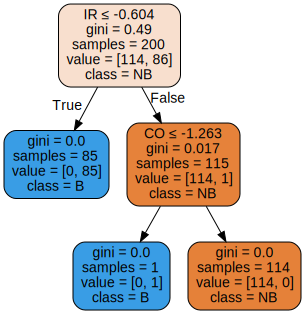

In [24]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=variable_names,  
                         class_names=['NB','B'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [25]:
clf.score(PC_test, y_test)

0.98

In [26]:
results = model_selection.cross_val_score(clf, PC_train, y_train, cv=kfold)
print(results)
print(results.mean())

[1.   1.   1.   0.95 1.   1.   1.   1.   1.   1.  ]
0.9949999999999999


The accuracy on test data dereases(maybe just in this senario because the train_test_split) while the accuracy improves on train data.

Maybe use PCA first can improve the result. Besides, the tree is much more concise.

### Combined with Bagging and Boosting?

### Bagged Decision Trees

In [27]:
cart = tree.DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)
results = model_selection.cross_val_score(model, PC_train, y_train, cv=kfold)
print(results)
print(results.mean())

[1.   1.   1.   0.95 1.   1.   1.   1.   1.   1.  ]
0.9949999999999999


In [28]:
model.fit(PC_train, y_train).score(PC_test, y_test)

0.98

### Extra Trees

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
max_features = 5
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, PC_train, y_train, cv=kfold)
print(results)
print(results.mean())

[1.   1.   1.   0.95 1.   1.   1.   1.   1.   1.  ]
0.9949999999999999


In [30]:
model.fit(PC_train, y_train).score(PC_test, y_test)

1.0

### Adaboost

In [31]:
from sklearn.ensemble import AdaBoostClassifier
num_trees = 30
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, PC_train, y_train, cv=kfold)
print(results)
print(results.mean())

[1.   1.   1.   0.95 1.   1.   1.   1.   1.   1.  ]
0.9949999999999999


In [32]:
model.fit(PC_train, y_train).score(PC_test, y_test)

0.98

Basically did not improve....